In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import pearsonr



In [687]:
df = pd.DataFrame()
resultsdir = '../../SFE_RESULTS2/'
for log in os.listdir(resultsdir):
    if log.startswith('SF2pfes'):
        print(resultsdir + log + '/progress.log')
        dftmp = pd.read_csv(resultsdir + log + '/progress.log', sep='\t', comment='#')
        dftmp = dftmp[['gndx','seq_len','ptm', 'mean_plddt', 'score', 'mutation','sequence','ss']]
        #dftmp = dftmp.groupby('gndx').head(1)
        df = pd.concat([df, dftmp])


../../SFE_RESULTS2/SF2pfes_1/progress.log
../../SFE_RESULTS2/SF2pfes_10/progress.log
../../SFE_RESULTS2/SF2pfes_11/progress.log
../../SFE_RESULTS2/SF2pfes_12/progress.log
../../SFE_RESULTS2/SF2pfes_13/progress.log
../../SFE_RESULTS2/SF2pfes_14/progress.log
../../SFE_RESULTS2/SF2pfes_15/progress.log
../../SFE_RESULTS2/SF2pfes_16/progress.log
../../SFE_RESULTS2/SF2pfes_17/progress.log
../../SFE_RESULTS2/SF2pfes_18/progress.log
../../SFE_RESULTS2/SF2pfes_19/progress.log
../../SFE_RESULTS2/SF2pfes_2/progress.log
../../SFE_RESULTS2/SF2pfes_20/progress.log
../../SFE_RESULTS2/SF2pfes_21/progress.log
../../SFE_RESULTS2/SF2pfes_22/progress.log
../../SFE_RESULTS2/SF2pfes_23/progress.log
../../SFE_RESULTS2/SF2pfes_24/progress.log
../../SFE_RESULTS2/SF2pfes_25/progress.log
../../SFE_RESULTS2/SF2pfes_3/progress.log
../../SFE_RESULTS2/SF2pfes_4/progress.log
../../SFE_RESULTS2/SF2pfes_5/progress.log
../../SFE_RESULTS2/SF2pfes_6/progress.log
../../SFE_RESULTS2/SF2pfes_7/progress.log
../../SFE_RESULTS2

In [700]:
df2 = pd.DataFrame()
resultsdir = '../../SFE_RESULTS/'
for log in os.listdir(resultsdir):
    if log.startswith('run') or log.startswith('SF') or log.startswith('hth'):
        print(resultsdir + log + '/progress.log')
        dftmp = pd.read_csv(resultsdir + log + '/progress.log', sep='\t', comment='#')
        dftmp = dftmp[['gndx','seq_len','ptm', 'mean_plddt', 'score', 'sequence','ss']]
        #dftmp = dftmp.groupby('gndx').head(1)
        df2 = pd.concat([df, dftmp])


../../SFE_RESULTS/hth_5yiw_1/progress.log
../../SFE_RESULTS/hth_5yiw_2/progress.log
../../SFE_RESULTS/hth_5yiw_3/progress.log
../../SFE_RESULTS/hth_5yiw_pl100_ps200_1/progress.log
../../SFE_RESULTS/hth_5yiw_pl100_ps200_2/progress.log
../../SFE_RESULTS/hth_5yiw_pl100_ps200_3/progress.log
../../SFE_RESULTS/hth_5yiw_pl100_ps200_4/progress.log
../../SFE_RESULTS/hth_5yiw_pl100_ps200_5/progress.log
../../SFE_RESULTS/hth_5yiw_pl70_1/progress.log
../../SFE_RESULTS/hth_5yiw_pl70_2/progress.log
../../SFE_RESULTS/hth_5yiw_pl70_3/progress.log
../../SFE_RESULTS/hth_5yiw_pl70_ps200_1/progress.log
../../SFE_RESULTS/hth_5yiw_pl70_ps200_2/progress.log
../../SFE_RESULTS/hth_5yiw_pl70_ps200_3/progress.log
../../SFE_RESULTS/hth_5yiw_pl70_ps200_4/progress.log
../../SFE_RESULTS/hth_5yiw_pl70_ps200_5/progress.log
../../SFE_RESULTS/hth_5yiw_ps200_1/progress.log
../../SFE_RESULTS/hth_5yiw_ps200_2/progress.log
../../SFE_RESULTS/hth_5yiw_ps200_3/progress.log
../../SFE_RESULTS/hth_5yiw_ps200_4/progress.log
../../

In [704]:
log = pd.concat([df, df2.drop(df2['mutation'].index)])

In [719]:
logbk = log
log = df2

In [720]:
alphabet = list('ACDEFGHIKLMNPQRSTVWY')

three2one = {'CYS': 'C', 'ASP': 'D', 'SER': 'S', 'GLN': 'Q', 'LYS': 'K',
     'ILE': 'I', 'PRO': 'P', 'THR': 'T', 'PHE': 'F', 'ASN': 'N', 
     'GLY': 'G', 'HIS': 'H', 'LEU': 'L', 'ARG': 'R', 'TRP': 'W', 
     'ALA': 'A', 'VAL':'V', 'GLU': 'E', 'TYR': 'Y', 'MET': 'M'}

one2three ={}

uniprot = {'amino_acid': ['Leu', 'Ala', 'Gly', 'Val', 'Ser', 'Glu', 'Arg', 'Thr', 'Ile', 'Asp', 'Pro', 'Lys', 'Phe', 'Gln', 'Asn', 'Tyr', 'Met', 'His', 'Cys', 'Trp'],
'percent': [9.84, 9.00, 7.26, 6.86, 6.85, 6.25, 5.85, 5.56, 5.52, 5.48, 5.01, 4.95, 3.88, 3.81, 3.80, 2.88, 2.33, 2.23, 1.30, 1.30]}

#https://www.uniprot.org/uniprotkb/statistics#amino-acid-composition
swissprot = {'amino_acid': ['Leu', 'Ala', 'Gly', 'Val', 'Glu', 'Ser', 'Ile', 'Lys', 'Arg', 'Asp', 'Thr', 'Pro', 'Asn', 'Gln', 'Phe', 'Tyr', 'Met', 'His', 'Cys', 'Trp'],
'percent': [9.65, 8.26, 7.07, 6.86, 6.72, 6.65, 5.91, 5.80, 5.53, 5.46, 5.36, 4.75, 4.06, 3.93, 3.87, 2.92, 2.41, 2.28, 1.39, 1.10]}	

dfUP = pd.DataFrame(uniprot).sort_values('amino_acid')
dfSP = pd.DataFrame(swissprot).sort_values('amino_acid')
resdata = pd.DataFrame({'amino_acid': dfUP.amino_acid, 'UPpercent': dfUP.percent, 'SPpercent': dfSP.percent})
resdata.insert(loc=0, column='AA', value=[three2one[AA] for AA in resdata.amino_acid.str.upper()])
resdata_sorted = resdata.sort_values('AA')



In [725]:
seqstrs = log[(log.ptm > 0.5) & (log.mean_plddt > 0.9)].drop_duplicates('sequence').sequence.str
len(seqstrs.len())

81086

In [726]:
AAoccurance = {AA: seqstrs.count(AA).sum() for AA in alphabet} 
n_allAA = sum(AAoccurance.values())
pfes_percent = {AA:round((AAoccurance[AA]/n_allAA) * 100, 3) for AA in AAoccurance}

In [727]:
resdata_sorted['pfes_percent'] = pfes_percent.values()
resdata_sorted.reset_index(inplace = True, drop=True )


PearsonRResult(statistic=0.38526136074067163, pvalue=0.0934491508156208)
PearsonRResult(statistic=0.4822588250494086, pvalue=0.04267863572547603)


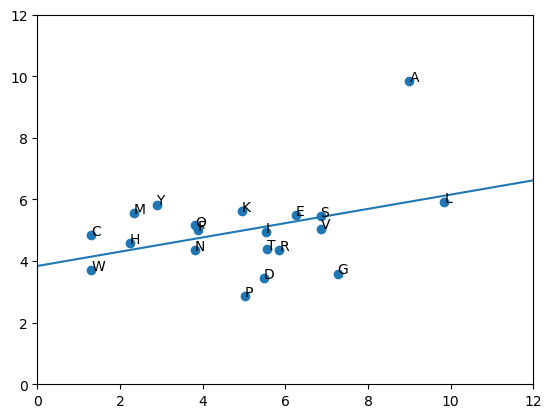

In [728]:
resdata_sorted2 = resdata_sorted.drop(resdata_sorted[(resdata_sorted["AA"] == 'G') | (resdata_sorted["AA"] == 'C')].index)

x = resdata_sorted.UPpercent
y = resdata_sorted.pfes_percent



fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlim(0,12)
ax.set_ylim(0,12)
for i, res in enumerate(resdata_sorted.AA):
    ax.annotate(res, (x[i], y[i]))

m, b = np.polyfit(x, y, 1)
X_plot = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1], 100)
plt.plot(X_plot, m*X_plot + b, '-')


print(pearsonr(list(resdata_sorted.UPpercent), list(resdata_sorted.pfes_percent)))
print(pearsonr(list(resdata_sorted2.UPpercent), list(resdata_sorted2.pfes_percent)))

# Make substitution matrix 

In [ ]:
mutations_list = list(log[(log.mutation.str.contains('\.')) & (log.mean_plddt > 0.85)].drop_duplicates('sequence').mutation)
subst_list = [(m[0],m[-1]) for m in mutations_list]


In [ ]:
matrix=np.empty((20,20))
for a, i in zip(alphabet,range(20)):
    for b, j in zip(alphabet,range(20)):
        matrix[i][j] = subst_list.count((a,b))

for i in range(20): matrix[i][i] = 0 


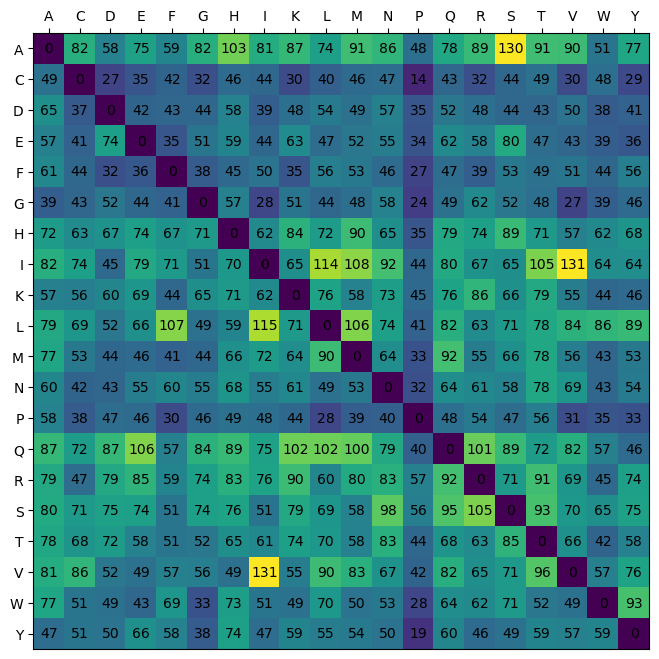

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
ax.imshow(matrix)
ax.xaxis.tick_top()
ticks = alphabet
plt.setp(ax, xticks=range(20), xticklabels=ticks, yticks=range(20), yticklabels=ticks, )

for (j,i),label in np.ndenumerate(matrix):
    ax.text(i,j,round(label),ha='center',va='center')


# Make substitution matrix 

In [65]:
df = pd.DataFrame()
stat_dict1 = {}
resultsdir = '../../SFE_RESULTS/'
for log in os.listdir(resultsdir):
    if log.startswith('SFpfes'):
        print(resultsdir + log + '/progress.log')
        df = pd.read_csv(resultsdir + log + '/progress.log', sep='\t', comment='#')
        boolist = (df['mean_plddt'] > 0.7) & (df['ptm'] > 0.7) & (df['seq_len'] > 50)
        i=0
        for line  in boolist:
            if line == True:
                stat_dict1[log] = i
                print(f'fold evolver after {i} mutatins')
                break
            i+=1

../../SFE_RESULTS/SFpfes1/progress.log
fold evolver after 32500 mutatins
../../SFE_RESULTS/SFpfes10/progress.log
fold evolver after 29700 mutatins
../../SFE_RESULTS/SFpfes11/progress.log
fold evolver after 5600 mutatins
../../SFE_RESULTS/SFpfes12/progress.log
fold evolver after 15400 mutatins
../../SFE_RESULTS/SFpfes13/progress.log
fold evolver after 4900 mutatins
../../SFE_RESULTS/SFpfes14/progress.log
fold evolver after 5700 mutatins
../../SFE_RESULTS/SFpfes15/progress.log
fold evolver after 8149 mutatins
../../SFE_RESULTS/SFpfes16/progress.log
fold evolver after 8000 mutatins
../../SFE_RESULTS/SFpfes17/progress.log
fold evolver after 65200 mutatins
../../SFE_RESULTS/SFpfes18/progress.log
fold evolver after 5600 mutatins
../../SFE_RESULTS/SFpfes19/progress.log
fold evolver after 2400 mutatins
../../SFE_RESULTS/SFpfes2/progress.log
fold evolver after 7400 mutatins
../../SFE_RESULTS/SFpfes20/progress.log
fold evolver after 16012 mutatins
../../SFE_RESULTS/SFpfes21/progress.log
fold evo

In [66]:
df = pd.DataFrame()
stat_dict2 = {}
resultsdir = '../../SFE_RESULTS2/'
for log in os.listdir(resultsdir):
    if log.startswith('SF2pfes'):
        print(resultsdir + log + '/progress.log')
        df = pd.read_csv(resultsdir + log + '/progress.log', sep='\t', comment='#')
        boolist = (df['mean_plddt'] > 0.7) & (df['ptm'] > 0.7) & (df['seq_len'] > 50)
        i=0
        for line  in boolist:
            if line == True:
                stat_dict2[log] = i
                print(f'fold evolver after {i} mutatins')
                break
            i+=1

../../SFE_RESULTS2/SF2pfes_1/progress.log
fold evolver after 32300 mutatins
../../SFE_RESULTS2/SF2pfes_10/progress.log
fold evolver after 7900 mutatins
../../SFE_RESULTS2/SF2pfes_11/progress.log
fold evolver after 16200 mutatins
../../SFE_RESULTS2/SF2pfes_12/progress.log
fold evolver after 24000 mutatins
../../SFE_RESULTS2/SF2pfes_13/progress.log
fold evolver after 12705 mutatins
../../SFE_RESULTS2/SF2pfes_14/progress.log
fold evolver after 41567 mutatins
../../SFE_RESULTS2/SF2pfes_15/progress.log
fold evolver after 8900 mutatins
../../SFE_RESULTS2/SF2pfes_16/progress.log
fold evolver after 38700 mutatins
../../SFE_RESULTS2/SF2pfes_17/progress.log
fold evolver after 16100 mutatins
../../SFE_RESULTS2/SF2pfes_18/progress.log
fold evolver after 27900 mutatins
../../SFE_RESULTS2/SF2pfes_19/progress.log
fold evolver after 16000 mutatins
../../SFE_RESULTS2/SF2pfes_2/progress.log
fold evolver after 20703 mutatins
../../SFE_RESULTS2/SF2pfes_20/progress.log
fold evolver after 4000 mutatins
../.

In [67]:
df = pd.DataFrame()
stat_dict3 = {}
resultsdir = '../../SFE_RESULTS3/'
for log in os.listdir(resultsdir):
    if log.startswith('SF3pfes'):
        print(resultsdir + log + '/progress.log')
        df = pd.read_csv(resultsdir + log + '/progress.log', sep='\t', comment='#')
        boolist = (df['mean_plddt'] > 0.7) & (df['ptm'] > 0.7) & (df['seq_len'] > 50)
        i=0
        for line  in boolist:
            if line == True:
                stat_dict3[log] = i
                print(f'fold evolver after {i} mutatins')
                break
            i+=1

../../SFE_RESULTS3/SF3pfes_1/progress.log
fold evolver after 8000 mutatins
../../SFE_RESULTS3/SF3pfes_10/progress.log
fold evolver after 14300 mutatins
../../SFE_RESULTS3/SF3pfes_11/progress.log
fold evolver after 18400 mutatins
../../SFE_RESULTS3/SF3pfes_12/progress.log
fold evolver after 87294 mutatins
../../SFE_RESULTS3/SF3pfes_13/progress.log
fold evolver after 11500 mutatins
../../SFE_RESULTS3/SF3pfes_14/progress.log
fold evolver after 23600 mutatins
../../SFE_RESULTS3/SF3pfes_2/progress.log
fold evolver after 22600 mutatins
../../SFE_RESULTS3/SF3pfes_3/progress.log
fold evolver after 16917 mutatins
../../SFE_RESULTS3/SF3pfes_4/progress.log
fold evolver after 3300 mutatins
../../SFE_RESULTS3/SF3pfes_5/progress.log
fold evolver after 8201 mutatins
../../SFE_RESULTS3/SF3pfes_6/progress.log
fold evolver after 9904 mutatins
../../SFE_RESULTS3/SF3pfes_7/progress.log
fold evolver after 9900 mutatins
../../SFE_RESULTS3/SF3pfes_8/progress.log
fold evolver after 36400 mutatins
../../SFE_RE

In [68]:
df = pd.DataFrame()
stat_dict4 = {}
resultsdir = '../../IFE_RESULTS/'
for log in os.listdir(resultsdir):
    if log.startswith('inter_hth_'):
        print(resultsdir + log + '/progress.log')
        df = pd.read_csv(resultsdir + log + '/progress.log', sep='\t', comment='#')
        boolist = (df['mean_plddt'] > 0.7) & (df['ptm'] > 0.7) & (df['seq_len'] > 50)
        i=0
        for line  in boolist:
            if line == True:
                stat_dict4[log] = i
                print(f'fold evolver after {i} mutatins')
                break
            i+=1

../../IFE_RESULTS/inter_hth_5yiw/progress.log
../../IFE_RESULTS/inter_hth_5yiw_1/progress.log
../../IFE_RESULTS/inter_hth_5yiw_2/progress.log
fold evolver after 75100 mutatins
../../IFE_RESULTS/inter_hth_5yiw_3/progress.log
fold evolver after 137700 mutatins
../../IFE_RESULTS/inter_hth_5yiw_4/progress.log
fold evolver after 74400 mutatins
../../IFE_RESULTS/inter_hth_5yiw_5/progress.log
fold evolver after 145500 mutatins
../../IFE_RESULTS/inter_hth_5yiw_optimiz_with_reps_5/progress.log
fold evolver after 0 mutatins


In [130]:
alldicts = stat_dict1  | stat_dict3

In [131]:
alldicts.pop('SFpfes3_optimization')

0

(0.0, 100000.0)

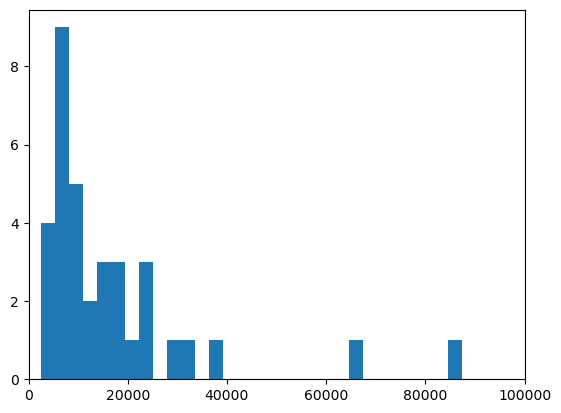

In [136]:
plt.hist(list(alldicts.values()), bins=30)
plt.xlim(0,100000)
